# Data Science Lab: Lab 1

Submit:

A pdf of your notebook with solutions.
A link to your colab notebook or also upload your .ipynb if not working on colab.

**Goals of this Lab:**
1.  Review important results from probability, such as the CLT.
2.  Connecting that review with basic Python commands.
3.  Practice with Pandas, Numpy and Data Exploration.


In [1]:
# Some useful libraries
import numpy as np
from numpy.random import default_rng

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#for nice vector graphics
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

np.random.seed(42) # Fixed seed for reproducibility, do not change this value
rng = default_rng()

/tmp/ipykernel_31679/1432850387.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Problem 1

**Part 1.** Generate 1,000 samples of 2 dimensional data from the Gaussian distribution $\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}2 & 0.8\\0.8 & 3\end{array}\right)\biggr)$.

**Part 2.** Plot these points.

**Part 3.** Find the Eigenvectors and Eigenvalues of the covariance matrix using np.linalg.eig, or np.linalg.eigh, or something else of your choice.

**Part 4.** Now take the 1,000 points you generated in the first part, and use them to estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

*Remark*: If you did this correctly: You should have made a number of observations. (i) The points you plotted should look like an elongated ellipse. (ii) The axis of elongation (the major axis of the ellipse) should be aligned with the eigenvector you computed that has the largest eigenvalue. The minor axis, should be aligned with the other eigenvector you computed. (iii) In the last part, you computed what is called the *empirical covariance* matrix. This should be quite close to the covariance matrix you used to generate the data. If we used more and more points (10,000, 100,000, etc.), then our empirical estimate would look more and more like what we used to generate the data.


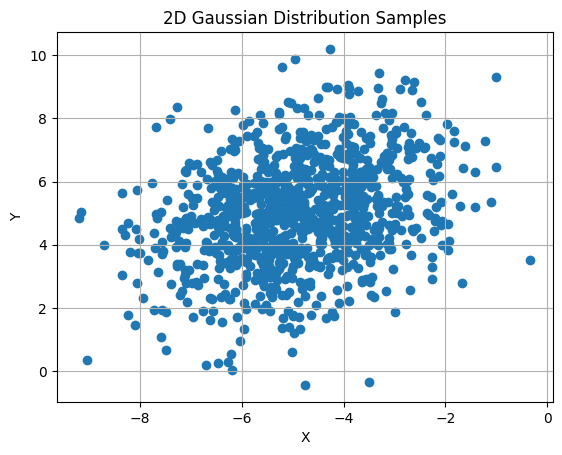

Eigenvalues: [1.55660189 3.44339811]
Eigenvectors: [[-0.87464248 -0.48476853]
 [ 0.48476853 -0.87464248]]
Estimated Mean Matrix: [-4.90796615  5.01939811]

Estimated Covariance Matrix: [[1.97791697 0.67256201]
 [0.67256201 2.80486179]]


In [2]:
#Part 1
mean = [-5, 5]
covariance_matrix = [[2, 0.8], [0.8, 3]]
num_samples = 1000

samples = np.random.multivariate_normal(mean, covariance_matrix, num_samples)

#Part 2
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution Samples')
plt.grid(True)
plt.show()

#Part 3
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors: {eigenvectors}")

#Part 4
# Adds up all the samples
estimated_mean = np.zeros(2)
for i in range(num_samples):
    estimated_mean += samples[i]

# Divide by number of sample to find mean
estimated_mean /= num_samples
print(f"Estimated Mean Matrix: {estimated_mean}")

# Create covariance matrix
estimated_cov = np.zeros((2, 2))
for i in range(num_samples):
    x_diff = samples[i, 0] - estimated_mean[0]
    y_diff = samples[i, 1] - estimated_mean[1]

    # Variance of X (Cov(X, X))
    estimated_cov[0,0] += x_diff * x_diff

    # Covariance of X,Y (Cov(X, Y))
    estimated_cov[0,1] += x_diff * y_diff

    # Covariance of Y,X (Cov(Y, X))
    estimated_cov[1,0] += y_diff * x_diff

    # Variance of Y (Cov(Y, Y))
    estimated_cov[1,1] += y_diff * y_diff

estimated_cov /= num_samples

print(f"\nEstimated Covariance Matrix: {estimated_cov}")



# Problem 2: Central Limit Theorem

Back in EE351K you learned the Law of Large Numbers, and the Central Limit Theorem, among many other things. The Law of Large Numbers says that if $X_i$ are independent and identically distributed (iid) random variables, then $(1/N) \sum X_i$ converges to $\mathbb{E}[X]$. That's the law of large numbers.

You also learned the Central Limit Theorem. This says that if $X_i$ are zero mean, have variance 1, and are iid, then $(1/\sqrt{N}) \sum X_i$ converges to a random variable. Which random variable? A standard (zero mean, unit variance) Gaussian.

We're going to check the central limit theorem empirically, as an excuse to do more practice with Python and numpy and basic plotting.

Let $X_i$ be an iid Bernoulli random variable with value \{-1,1\}. Look at the random variable
$Z_n = \frac{1}{\sqrt{n}}\sum X_i$. By taking 1000 samples from $Z_n$, plot its histogram. {\bf Note:} To generate 1,000 samples from $Z_n$, you need to generate $1,000 \times n$ samples of $X_i$, since each $Z$ needs $1,000$ $X_i$'s. Now check that for small $n$ (set $n= 5$) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (set $n = 50$) it looks much more like a Gaussian. Check also for much bigger $n$: $n = 250$, to see that at this point, one can really see the bell curve.

# Problem 3

Download from Canvas/Files the datasetPatientData.csv. Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the data set. For example:

Part 1.  How many patients and how many features are there?

Part 2.  What is the meaning of the first 4 features?  See if you can understand what they mean.

Part 3.  Are there missing values?  Replace them with the average of the corresponding feature column and plot the feature histograms with 

Part 4.  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

# Problem 4

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set.  Download the fileNames.zip from Canvas.  This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

Part 1. Write a program that on input $k$ and XXXX, returns the top $k$ names from year XXXX. Print out the top 100 names from the year 2000

Part 2. Write a program that on input Name returns the frequency for men and women of the name Name. Plot the frequency of the name "Alex" from the year 1880 to 2015

Part 3. It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  Modify the above to return the relative frequency. Plot the relative frequency of the name "Alex" from the year 1880 to 2015

Part 4. Find all the names that used to be more popular for one gender, but then became more popular for another gender and print out the first 100 names (alphabetized).

•(Optional) Find something cool about this data set.

['Jacob', 'Michael', 'Matthew', 'Joshua', 'Emily', 'Christopher', 'Nicholas', 'Andrew', 'Hannah', 'Joseph', 'Daniel', 'Tyler', 'William', 'Brandon', 'Ryan', 'John', 'Madison', 'Zachary', 'David', 'Anthony', 'Ashley', 'James', 'Justin', 'Sarah', 'Alexis', 'Alexander', 'Samantha', 'Jonathan', 'Christian', 'Austin', 'Jessica', 'Dylan', 'Ethan', 'Elizabeth', 'Taylor', 'Benjamin', 'Noah', 'Lauren', 'Samuel', 'Robert', 'Alyssa', 'Kayla', 'Abigail', 'Nathan', 'Brianna', 'Olivia', 'Cameron', 'Kevin', 'Thomas', 'Jose', 'Emma', 'Hunter', 'Jordan', 'Kyle', 'Megan', 'Grace', 'Victoria', 'Rachel', 'Anna', 'Sydney', 'Caleb', 'Destiny', 'Jason', 'Logan', 'Aaron', 'Morgan', 'Jennifer', 'Eric', 'Jasmine', 'Haley', 'Brian', 'Julia', 'Kaitlyn', 'Gabriel', 'Nicole', 'Amanda', 'Adam', 'Jack', 'Katherine', 'Natalie', 'Isaiah', 'Hailey', 'Juan', 'Luis', 'Alexandra', 'Connor', 'Charles', 'Elijah', 'Isaac', 'Steven', 'Evan', 'Jared', 'Sean', 'Timothy', 'Luke', 'Cody', 'Savannah', 'Chloe', 'Rebecca', 'Stephanie

['Aalijah',
 'Aamari',
 'Aaren',
 'Aareon',
 'Aari',
 'Aarian',
 'Aarin',
 'Aarion',
 'Aaris',
 'Aarya',
 'Aaryn',
 'Aavyn',
 'Aba',
 'Abba',
 'Abbey',
 'Abell',
 'Abey',
 'Abie',
 'Abijah',
 'Abimbola',
 'Abiola',
 'Abir',
 'Abishai',
 'Abiyah',
 'Abney',
 'Abrar',
 'Abraxas',
 'Abrian',
 'Abriel',
 'Aby',
 'Abyan',
 'Acea',
 'Acelin',
 'Acey',
 'Acie',
 'Acy',
 'Adair',
 'Adali',
 'Adalid',
 'Adama',
 'Adar',
 'Adason',
 'Addington',
 'Addis',
 'Addison',
 'Adean',
 'Adebola',
 'Adel',
 'Adell',
 'Adeyinka',
 'Adgie',
 'Adi',
 'Adie',
 'Adis',
 'Adisa',
 'Adlai',
 'Adley',
 'Admire',
 'Adna',
 'Adonai',
 'Adoniah',
 'Adraine',
 'Adrean',
 'Adriann',
 'Adrien',
 'Adrienn',
 'Adrin',
 'Adrine',
 'Adryan',
 'Adryn',
 'Adyn',
 'Aeon',
 'Aerion',
 'Aeron',
 'Afsheen',
 'Afton',
 'Agam',
 'Agape',
 'Ah',
 'Ahmari',
 'Ahmi',
 'Aideen',
 'Aidyn',
 'Aidynn',
 'Aijalon',
 'Aiman',
 'Aimar',
 'Aime',
 'Aimen',
 'Ainsley',
 'Airen',
 'Aireon',
 'Aires',
 'Airin',
 'Airon',
 'Aivan',
 'Ajae',
 'A

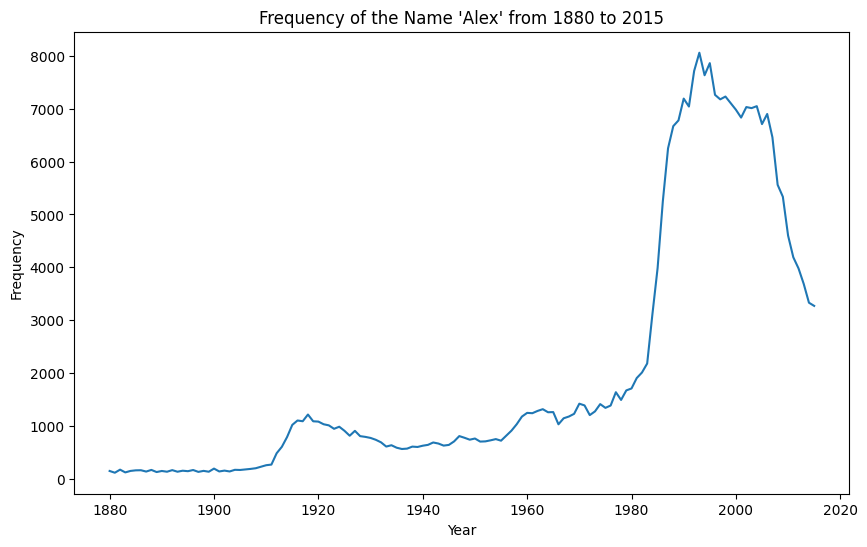

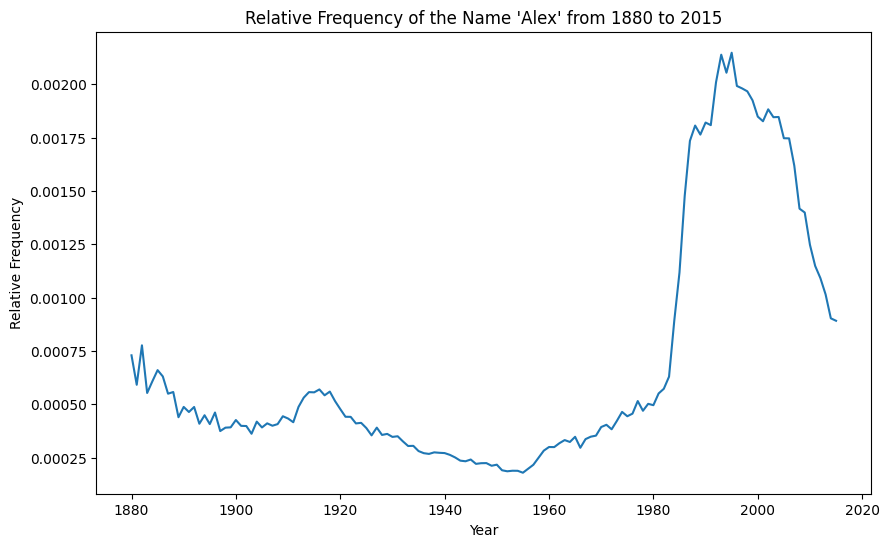

In [2]:
#Part 1
def get_names_dataset_for_year(year):
    # Create dataframe for yob{year}.txt file
    data = pd.read_csv(f"Names/yob{year}.txt", header=None)
    return data

def top_k_names_for_year(k, year):
    # Get dataframe that corresponds to year
    data = get_names_dataset_for_year(year)
    
    #Sort the data by count column(2) (can create and use column names but no need for this simple program)
    sorted_data = data.sort_values(by=2, ascending=False)
    return sorted_data[0].head(k).tolist()

top_names = top_k_names_for_year(100, 2000)
print(top_names)

#Part 2
def get_names_dataset(beg_year, end_year):
    # Create list to hold dataframes of all the yob{year}.txt files
    dataframes = []

    #Create dataframes for all yob{year} files from 1880 to 2015
    for year in range(beg_year, end_year+1):
        # Get dataframe for year and assign column names
        data = pd.read_csv(f"Names/yob{year}.txt", header=None)
        data.columns = ['Name', 'Gender', 'Count']
        
        # Add year column to specify year for plotting
        data['Year'] = year
        
        # Add dataframe to list of dataframes
        dataframes.append(data)
    
    #Concat all dataframes together to create dataset
    dataset = pd.concat(dataframes, ignore_index=True)
    return dataset

def freq_of_name(name, beg_year, end_year):
    # Get names dataset for year range
    dataset = get_names_dataset(beg_year, end_year)

    #Create dataframe for frequency of specific name
    names_freq = dataset[dataset['Name'] == name]
    #the .sum adds up counts if names appear for both female and male (can use pivot table but not needed for simple problem)
    names_freq = names_freq.groupby('Year')['Count'].sum()  
    return names_freq

# Plot frequency of name from given year range
def plot_freq_of_name(name, beg_year, end_year):
    names_freq = freq_of_name(name, beg_year, end_year)
    plt.figure(figsize=(10, 6))
    plt.plot(names_freq.index, names_freq.values)
    plt.title(f"Frequency of the Name '{name}' from {beg_year} to {end_year}")
    plt.xlabel('Year')
    plt.ylabel('Frequency')

#Plot the frequency of the name "Alex" from the year 1880 to 2015
plot_freq_of_name("Alex", 1880, 2015)

#Part 3
# Will reuse functions from Part 2
def rel_freq_of_name(name, beg_year, end_year):
    # Get names dataset for year range
    dataset = get_names_dataset(beg_year, end_year)

    # Get total count of names per year (can use pivot table but not needed for simple problem)
    names_per_year = dataset.groupby('Year')['Count'].sum()
    
    #Create dataframe for frequency of specific name (can use pivot table but not needed for simple problem)
    names_freq = dataset[dataset['Name'] == name]
    rel_names_freq = names_freq.groupby('Year')['Count'].sum()

    # Calculates relative frequency of name
    rel_names_freq = rel_names_freq / names_per_year
    return rel_names_freq

# Plot frequency of name from given year range
def plot_rel_freq_of_name(name, beg_year, end_year):
    names_rel_freq = rel_freq_of_name(name, beg_year, end_year)
    plt.figure(figsize=(10, 6))
    plt.plot(names_rel_freq.index, names_rel_freq.values)
    plt.title(f"Relative Frequency of the Name '{name}' from {beg_year} to {end_year}")
    plt.xlabel('Year')
    plt.ylabel('Relative Frequency')

plot_rel_freq_of_name("Alex", 1880, 2015)

#Part 4
def get_gender_dataset(beg_year, end_year):
    dataset = get_names_dataset(beg_year, end_year)

    # Create pivot table that diffentiates between counts for name in gender for each name per year and automatically fills 0 if name only pertains to one gender
    name_per_gender_per_year = dataset.pivot_table(index=['Name', 'Year'], columns='Gender', values='Count', aggfunc='sum', fill_value=0)

    return name_per_gender_per_year

def find_switched_gender_name(k, beg_year, end_year):
    dataset = get_gender_dataset(beg_year, end_year)

    # Add extra column for popular gender for name for that year
    dataset['Popular_Gender'] = np.where(dataset['M'] > dataset['F'], 'M', 'F')
    
    # Add previous dominant gender to compare popular gender and detect if there was a change in gender popularity
    dataset['Prev_Popular_Gender'] = dataset.groupby('Name')['Popular_Gender'].shift(1)

    # Handle cases where counts of M and F are the same by carrying forward the previous popular gender
    dataset['Popular_Gender'] = np.where(dataset['M'] == dataset['F'], dataset['Prev_Popular_Gender'], dataset['Popular_Gender'])

    # Find rows where the popular gender has changed and accounts for first row of prev_popular_gender which is NaN
    dataset['Gender_Switched'] = np.where((dataset['Popular_Gender'] != dataset['Prev_Popular_Gender']) & (~dataset['Prev_Popular_Gender'].isna()), True, False)

    #Get names where the popular gender switched
    switched_gender_names = dataset[dataset['Gender_Switched'] == True]

    # Reset index so that 'Name' is a column again so we can use
    switched_gender_names.reset_index(inplace=True)

    # Get just names using unique because each name can have multiple times when popular gender has changed from previous year
    switched_gender_names = switched_gender_names['Name'].unique().tolist()
    switched_gender_names.sort()

    # Return top k names that had change in popular gender
    return switched_gender_names[:k]
    
find_switched_gender_name(100, 1880, 2015)

# Problem 5

We looked at the MNIST data set in class. Recall that MNIST is a data set of handwritten digits. It is considered one of the ``easiest'' image recognition problems in computer vision. You can find the MNIST data set which we will use, here: https://www.openml.org/d/554. Though we haven't introduced decision trees formally, we have had a chance to see them in action in class. This exercise is an opportunity to play around with this data set, and in advance of when we get to talk about decision trees in detail, have a chance to see how they work. In short, this is an exercise in learning-by-doing.


Part 1. (Nothing to submit) Make sure you can run through the entire Colab notebook posted. Especially if you haven't used Python, try to understand what every line is doing.

Part 2. How many data points are there, how many features are there, and what do the features represent?

Part 3. Compute how many times each digit appears in the dataset.

Part 4. Read the documentation for sklearn.model_selection.train_test_split and explain what this does.

Part 5. Read the documentation for DecisionTreeClassifier, and explain what score means.

Part 6. What happens to the **training score** as you increase the depth of the tree? Explain.

Part 7. What happens to the difference between **training score** and **testing score** as you increase the depth of the tree? Explain.

Part 8. Fix the depth of the three, say, depth=7. Then plot the difference of training score - testing score when you train on: 100, 500, 5000, 10000, 15,0000, 20,000, 25,000 points, always computing testing score by evaluating on the complement of the training set. Plot this trend.  Try to explain what you are seeing.  


# Problem 6

We now turn to a somewhat more sophisticated data set: CIFAR10.
Here is an initial colab notebook: https://colab.research.google.com/drive/1H3a4yVuZLatBvFjrUp5aFBJn_vfmXj7o?usp=sharing

Part 1. How many data points are there, and how many labels? How many points for each label?

Part 2. There are two ``TO DOs'' listed in the colab notebook. Complete these.


If you did this correctly and ran the notebook, you noticed that CIFAR10 indeed looks like a ``harder'' problem. Deep trees are again doing very well on the training set, and they do a little better than guessing on the testing data, but not as well as they do on MNIST. We will revisit CIFAR10 several times, as we develop more powerful tools. And we will see that we will do much better than deep decision trees!